# PHASE 4 PROJECT

## SENTIMENT ANALYSIS

# 1.0 Introduction
### 1.1 Business Understanding:
In the modern digital landscape, customer perception of a brand can shift rapidly. Social media platforms like Twitter provide companies with a direct view into what consumers are saying in real time. For Apple and Google, two major tech giants, knowing how their products are perceived is crucial for maintaining competitive advantage and driving customer engagement.

Through this project, sentiment analysis will offer both companies the opportunity to:

- Identify and address negative feedback in real time, mitigating potential damage to the brand or product.
- Capitalize on positive sentiment to enhance brand reputation, tailoring marketing strategies to increase sales.
- Track shifts in sentiment related to product releases or updates, enabling data-driven product development and refinement.
- The resulting sentiment model will automate the process of monitoring consumer opinions, reducing manual efforts while providing a constant stream of customer insights to guide business decisions.

### 1.2 Objectives
Objective 1: Preprocessing Data
Goal: Clean and prepare the Twitter dataset. This includes handling noise (e.g., hashtags, mentions, special characters), tokenization, lowercasing, removing stopwords, and applying techniques such as stemming or lemmatization.
Why: Tweets are often noisy and contain informal language. Properly cleaning and preprocessing the text data ensures that the NLP model is built on high-quality, meaningful input, improving the model's performance.

Objective 2: Build and Evaluate Sentiment Classification Models
Goal: Train machine learning models (such as Decision Trees, Random Forest, GradientBoosting, Bagging, AdaBoost and XGBoost) and deep learning models (such as LSTM or CNN) to classify tweets into three sentiment categories: positive, negative, or neutral. Use appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) to assess model performance.
Why: Developing a sentiment classifier enables automatic, large-scale analysis of public opinion, which can then be utilized to track brand sentiment, identify user feedback trends, and support decision-making.

Objective 3: Provide Actionable Insights through Sentiment Trends
Goal: Use the trained sentiment model to analyze sentiment trends over time for Apple and Google products. Identify periods of heightened positive or negative sentiment and correlate them with product releases, updates, or announcements.
Why: Monitoring sentiment trends over time helps Apple and Google understand how their users respond to product launches or new features. This can inform future marketing campaigns and product development strategies, optimizing customer satisfaction and retention.

## 2.0 Data Preparation
In this section we'll first import all the neccessary libraries that we need to carry out our project. We will then load our csv file and understand what it contains.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv('judge-1377884607_tweet_product_company (1).csv',encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


On reading the CSV file, we can see it contains three columns namely; 'tweet_text': Contains the Actual tweet, 'emotion_in_tweet_is_directed_at': Contains the brand to which the tweet is addressing, 'is_there_an_emotion_directed_at_a_brand_or_product': Contains the type of emotion relayed by the tweet.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


All the columns are of the data type object meaning they are strings

In [4]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [5]:
df['Type of emotion'] = df['is_there_an_emotion_directed_at_a_brand_or_product']
df['Type of emotion'] = df['Type of emotion'].replace({
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative',
    "I can't tell": 'Unknown',
    'No emotion toward brand or product': 'Neutral'})


In [6]:
df = df.drop('is_there_an_emotion_directed_at_a_brand_or_product',axis=1)
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,Type of emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


We can see there are two columns which containing missing information.

## Data Preparation

Fill in the missing values using the most frequent values

In [7]:
imputer_mode = SimpleImputer(strategy='constant')
df = pd.DataFrame(imputer_mode.fit_transform(df), columns=df.columns)
df.isna().sum()

tweet_text                         0
emotion_in_tweet_is_directed_at    0
Type of emotion                    0
dtype: int64

As part of preprocessing our data, we'll tokenize the tweet_text.This can include:
- lower casing
- removing numerics 
- removing stopwords
- stemming/lemmatization

In [8]:
df.dtypes

tweet_text                         object
emotion_in_tweet_is_directed_at    object
Type of emotion                    object
dtype: object

In [9]:
def tokenize_and_prepocess(tweet_text):
    stopwords_list = set(stopwords.words('english'))
    tweet_text = str(tweet_text)
    #Lowercasing
    tweet_text = tweet_text.lower()

    #Remove usernames(@) and hashtags(#)
    tweet_text = re.sub(r'@[A-Za-z0-9_]+|#[A-Za-z0-9]+','',tweet_text)
    # Remove URLs
    tweet_text = re.sub(r'http\S+|www\S+', '', tweet_text)
    
    
    tokenized_tweet_text = word_tokenize(tweet_text)

    tokenized_tweet_text = [word for word in tokenized_tweet_text if word not in stopwords_list]

    def remove_punctuation_and_stem(tweet_tokenized):
        stemmer = SnowballStemmer('english')

        clean_stemmed_tweet = [stemmer.stem(token) for token in tweet_tokenized if token.isalpha()]
        return " ".join(clean_stemmed_tweet)
    preprocessed = remove_punctuation_and_stem(tokenized_tweet_text)

    return preprocessed

df['preprocessed_text'] = df['tweet_text'].apply(tokenize_and_prepocess)
new_df = df.drop('tweet_text',axis=1)
new_df = new_df[['preprocessed_text','emotion_in_tweet_is_directed_at','Type of emotion']] #Reorganize the columns
new_df.head()

,preprocessed_text,emotion_in_tweet_is_directed_at,Type of emotion
0,iphon hrs tweet dead need upgrad plugin station,iPhone,Negative
1,know awesom app like appreci design also give ...,iPad or iPhone App,Positive
2,wait also sale,iPad,Positive
3,hope year festiv crashi year iphon app,iPad or iPhone App,Negative
4,great stuff fri marissa mayer googl tim tech a...,Google,Positive


In [10]:
new_df['Type of emotion'].value_counts()

Neutral     5389
Positive    2978
Negative     570
Unknown      156
Name: Type of emotion, dtype: int64

In [11]:
X = new_df.drop('Type of emotion',axis=1)
y = new_df['Type of emotion']

X_train,X_test,y_train,y_test = train_test_split(new_df['preprocessed_text'],new_df['Type of emotion'],test_size=0.3,random_state=42)
X_train

2954                   glad standard navig tool might one
2709    readi take tech geekdom whole new level need t...
2357    panel get great start video surui carbon proje...
6195      rt join tonight person friend citi end win ipad
1366         spread word festiv explor app live free link
                              ...                        
5734    rt mani ask last night free android phone sign...
5191    rt quot googl quot refriger magnet game quot e...
5390    rt android develop friend let hang saturday li...
860     geeki love rt appl open temporari store downto...
7270    anyon know iphon develop attend pleas let know...
Name: preprocessed_text, Length: 6365, dtype: object

In [12]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
X_train_vectorized

<6365x4997 sparse matrix of type '<class 'numpy.float64'>'
	with 56130 stored elements in Compressed Sparse Row format>

For my Baseline model I'll use Decision Tree Model

In [13]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_vectorized,y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
y_pred_vectorized = decision_tree.predict(X_test_vectorized)

In [15]:
print(classification_report(y_test,y_pred_vectorized))

              precision    recall  f1-score   support

    Negative       0.32      0.20      0.24       173
     Neutral       0.67      0.73      0.70      1597
    Positive       0.51      0.48      0.50       915
     Unknown       0.00      0.00      0.00        43

    accuracy                           0.60      2728
   macro avg       0.38      0.35      0.36      2728
weighted avg       0.59      0.60      0.59      2728



c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


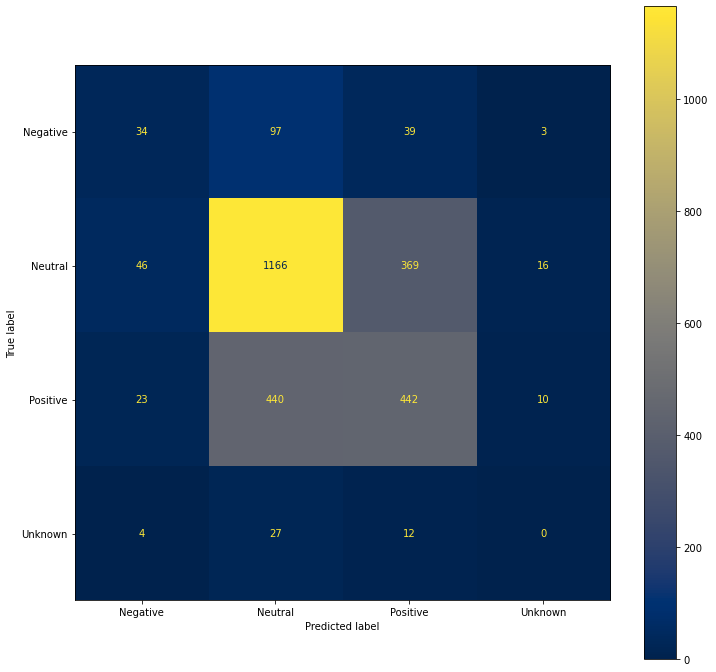

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(decision_tree, X_test_vectorized, y_test, ax=ax, cmap="cividis");

Moving on to Advanced Machine Learning Models,

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_vectorized,y_train)


KNeighborsClassifier()

In [18]:
y_pred_knn = knn.predict(X_test_vectorized)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

    Negative       0.50      0.13      0.20       173
     Neutral       0.62      0.95      0.75      1597
    Positive       0.69      0.18      0.28       915
     Unknown       0.00      0.00      0.00        43

    accuracy                           0.62      2728
   macro avg       0.45      0.31      0.31      2728
weighted avg       0.62      0.62      0.54      2728



c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In comparison to the accuracy of our decision tree model, the accuracy of our KNN model has slightly improved by 2%. We are then going to utilize GridSearch CV to perform an exhaustive check of hyperparameter combinations and fine tune model performance.

In [19]:
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [20]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Text feature extraction
    ('model', KNeighborsClassifier())  # Placeholder model
])
parameters = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7]
    },
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100],
        'model__max_depth': [3, 5, 7]
    },
    {
        'model': [BaggingClassifier()],
        'model__n_estimators': [50, 100],
    },
    {
        'model': [AdaBoostClassifier()],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1]
    },
    {
        'model': [GradientBoostingClassifier()],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    },
    {
        'model': [XGBClassifier()],
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    }
]

gscv = GridSearchCV(param_grid=parameters,cv=10,estimator=pipeline,error_score='raise')
gscv.fit(X_train,y_train_encoded)
best_model = gscv.best_estimator_
print("Best model and parameters:", gscv.best_params_)

Best model and parameters: {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), 'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}


In [31]:
y_train = y_train.astype(str)
y_test = y_test.astype(str)

In [34]:
label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive', 3: 'Unknown'}  # Modify according to your labels
y_pred = [label_mapping[pred] for pred in y_pred]

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.60      0.05      0.10       173
     Neutral       0.64      0.93      0.76      1597
    Positive       0.68      0.30      0.41       915
     Unknown       0.00      0.00      0.00        43

    accuracy                           0.65      2728
   macro avg       0.48      0.32      0.32      2728
weighted avg       0.64      0.65      0.59      2728



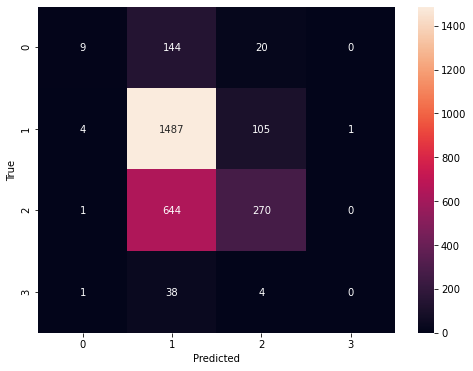

In [57]:
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2, 'Unknown': 3}  # Adjust based on your labels
y_test_encoded = [label_mapping[label] for label in y_test]
y_pred_encoded = [label_mapping[label] for label in y_pred]
cm = confusion_matrix(y_test_encoded, y_pred_encoded)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()